# Chrest Chart
Attempt to display a chart that shows the crest at each gauge for a single flood

y = stage heigh

x = river mile or gauge order

In [3]:
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path
files = list(Path("../crests").rglob("*.csv"))

df = pd.concat((pd.read_csv(f, sep="\t") for f in files)) 
df['location']= df['location'].astype(str)
df['utc']=pd.to_datetime(df['utc'])
                           
df

utc         id   stage stage_qualifiers  location  \
0   2021-09-17 19:45:58  1131828.0  174.44              NaN   SVPA-36   
1   2021-10-29 12:14:55  1197741.0   79.65              NaN   SVPA-36   
2   2021-11-13 04:15:03  1224179.0   80.13              NaN   SVPA-36   
3   2021-11-15 01:45:01  1227412.0   79.65              NaN   SVPA-36   
4   2021-11-27 03:29:57  1247787.0   72.63              NaN   SVPA-36   
..                  ...        ...     ...              ...       ...   
229 2022-05-06 10:00:00        NaN   12.43                P  12143400   
230 2022-05-16 09:30:00        NaN   12.79                P  12143400   
231 2022-05-27 17:15:00        NaN   12.69                P  12143400   
232 2022-06-06 04:15:00        NaN   13.36                P  12143400   
233 2022-06-10 06:15:00        NaN   13.88                P  12143400   

     discharge discharge_qualifiers  
0          NaN                  NaN  
1          NaN                  NaN  
2          NaN                  NaN  
3          NaN                  NaN  
4          NaN                  NaN  
..         ...                  ...  
229      786.0                    P  
230     1010.0                    P  
231      941.0                    P  
232     1410.0                    P  
233     1890.0                    P  

[5184 rows x 7 columns]

In [4]:
march_df = df[(df['utc'] > '2022-02-28') & (df['utc'] < '2022-03-03')]
march_df.head()

utc         id  stage stage_qualifiers location  discharge  \
9  2022-03-01 18:44:56  1393432.0  80.77              NaN  SVPA-36        NaN   
17 2022-03-01 17:15:06  1393330.0  94.47              NaN  SVPA-37        NaN   
26 2022-03-02 07:30:24  1394291.0  50.21              NaN  SVPA-15        NaN   
26 2022-03-02 08:15:06  1394329.0  47.24              NaN  SVPA-12        NaN   
48 2022-03-01 23:00:03  1393721.0  74.17              NaN  SVPA-25        NaN   

   discharge_qualifiers  
9                   NaN  
17                  NaN  
26                  NaN  
26                  NaN  
48                  NaN

In [5]:
jan_2022_df = df[(df['utc'] > '2022-01-11') & (df['utc'] < '2022-01-15')]
jan_2022_df

utc         id  stage stage_qualifiers  location  \
7   2022-01-12 23:59:58  1318981.0  79.79              NaN   SVPA-36   
15  2022-01-12 22:30:07  1318894.0  91.82              NaN   SVPA-37   
23  2022-01-14 00:30:04  1320593.0  46.28              NaN   SVPA-15   
24  2022-01-14 01:00:11  1320622.0  45.49              NaN   SVPA-12   
46  2022-01-13 06:59:56  1319441.0  71.39              NaN   SVPA-25   
7   2022-01-13 21:44:58  1320407.0  47.66              NaN  SVPA-15B   
15  2022-01-13 02:29:59  1319147.0  78.29              NaN   SVPA-34   
76  2022-01-12 23:30:02  1318955.0  84.24              NaN   SVPA-33   
28  2022-01-13 07:00:09  1319451.0  72.45              NaN   SVPA-26   
12  2022-01-13 21:45:07  1320416.0  53.41              NaN   SVPA-17   
153 2022-01-14 01:00:00        NaN  40.83                A  12150400   
470 2022-01-12 16:15:00        NaN  11.44                A  12141300   
374 2022-01-13 10:00:00        NaN  56.93                A  12149000   
431 2022-01-12 16:15:00        NaN  10.01                A  12142000   
501 2022-01-12 21:30:00        NaN  14.98                P  12144500   
225 2022-01-12 19:15:00        NaN  14.37                A  12143400   

     discharge discharge_qualifiers  
7          NaN                  NaN  
15         NaN                  NaN  
23         NaN                  NaN  
24         NaN                  NaN  
46         NaN                  NaN  
7          NaN                  NaN  
15         NaN                  NaN  
76         NaN                  NaN  
28         NaN                  NaN  
12         NaN                  NaN  
153        NaN                  NaN  
470    16500.0                    A  
374    28400.0                    A  
431     8820.0                    A  
501    25200.0                    P  
225     2380.0                    A

In [6]:
import json
with open('../locations.json') as json_file:
    data = json.load(json_file)
    locations = data['locations']
    loc_df = pd.DataFrame(locations)

loc_df

id                 name source upstreamOf  riverMile  stageOffset
0   12143400           South Fork   USGS   12144500        NaN          NaN
1   12141300          Middle Fork   USGS   12144500        NaN          NaN
2   12142000           North Fork   USGS   12144500        NaN          NaN
3   12144500                Falls   USGS   12149000       38.0        120.0
4    SVPA-37       Sno Falls Golf   SVPA        NaN       37.0          NaN
5    SVPA-36            Neal Road   SVPA        NaN       36.0          NaN
6    SVPA-34                The T   SVPA        NaN       34.0          NaN
7    SVPA-33         Keller Dairy   SVPA        NaN       33.0          NaN
8    SVPA-29         Jubilee Farm   SVPA        NaN       29.0          NaN
9    SVPA-26      Blue Heron Golf   SVPA        NaN       26.0          NaN
10   SVPA-25       Tolt Hill Road   SVPA        NaN       25.0          NaN
11  12149000            Carnation   USGS   12150400       22.0          NaN
12   SVPA-17  Goose & Gander Farm   SVPA        NaN       17.0          NaN
13   SVPA-15           124th East   SVPA        NaN       15.0          NaN
14  SVPA-15B           124th West   SVPA        NaN       15.0          NaN
15   SVPA-12     Wild Canary Farm   SVPA        NaN       12.0          NaN
16  12150400               Duvall   USGS        NaN        9.0          NaN

In [7]:
m_df = pd.merge(march_df, loc_df, left_on='location', right_on="id")
m_df = m_df[~pd.isnull(m_df['riverMile'])]
m_df.sort_values(by=['riverMile'], ascending=False, inplace = True)
m_df['flood']= 'March 2022'

j_df = pd.merge(jan_2022_df, loc_df, left_on='location', right_on="id")
j_df = j_df[~pd.isnull(j_df['riverMile'])]
j_df.sort_values(by=['riverMile'], ascending=False, inplace = True)
j_df['flood'] = 'January 2022'

j_df

utc       id_x  stage stage_qualifiers  location  \
14 2022-01-12 21:30:00        NaN  14.98                P  12144500   
1  2022-01-12 22:30:07  1318894.0  91.82              NaN   SVPA-37   
0  2022-01-12 23:59:58  1318981.0  79.79              NaN   SVPA-36   
6  2022-01-13 02:29:59  1319147.0  78.29              NaN   SVPA-34   
7  2022-01-12 23:30:02  1318955.0  84.24              NaN   SVPA-33   
8  2022-01-13 07:00:09  1319451.0  72.45              NaN   SVPA-26   
4  2022-01-13 06:59:56  1319441.0  71.39              NaN   SVPA-25   
12 2022-01-13 10:00:00        NaN  56.93                A  12149000   
9  2022-01-13 21:45:07  1320416.0  53.41              NaN   SVPA-17   
2  2022-01-14 00:30:04  1320593.0  46.28              NaN   SVPA-15   
5  2022-01-13 21:44:58  1320407.0  47.66              NaN  SVPA-15B   
3  2022-01-14 01:00:11  1320622.0  45.49              NaN   SVPA-12   
10 2022-01-14 01:00:00        NaN  40.83                A  12150400   

    discharge discharge_qualifiers      id_y                 name source  \
14    25200.0                    P  12144500                Falls   USGS   
1         NaN                  NaN   SVPA-37       Sno Falls Golf   SVPA   
0         NaN                  NaN   SVPA-36            Neal Road   SVPA   
6         NaN                  NaN   SVPA-34                The T   SVPA   
7         NaN                  NaN   SVPA-33         Keller Dairy   SVPA   
8         NaN                  NaN   SVPA-26      Blue Heron Golf   SVPA   
4         NaN                  NaN   SVPA-25       Tolt Hill Road   SVPA   
12    28400.0                    A  12149000            Carnation   USGS   
9         NaN                  NaN   SVPA-17  Goose & Gander Farm   SVPA   
2         NaN                  NaN   SVPA-15           124th East   SVPA   
5         NaN                  NaN  SVPA-15B           124th West   SVPA   
3         NaN                  NaN   SVPA-12     Wild Canary Farm   SVPA   
10        NaN                  NaN  12150400               Duvall   USGS   

   upstreamOf  riverMile  stageOffset         flood  
14   12149000       38.0        120.0  January 2022  
1         NaN       37.0          NaN  January 2022  
0         NaN       36.0          NaN  January 2022  
6         NaN       34.0          NaN  January 2022  
7         NaN       33.0          NaN  January 2022  
8         NaN       26.0          NaN  January 2022  
4         NaN       25.0          NaN  January 2022  
12   12150400       22.0          NaN  January 2022  
9         NaN       17.0          NaN  January 2022  
2         NaN       15.0          NaN  January 2022  
5         NaN       15.0          NaN  January 2022  
3         NaN       12.0          NaN  January 2022  
10        NaN        9.0          NaN  January 2022

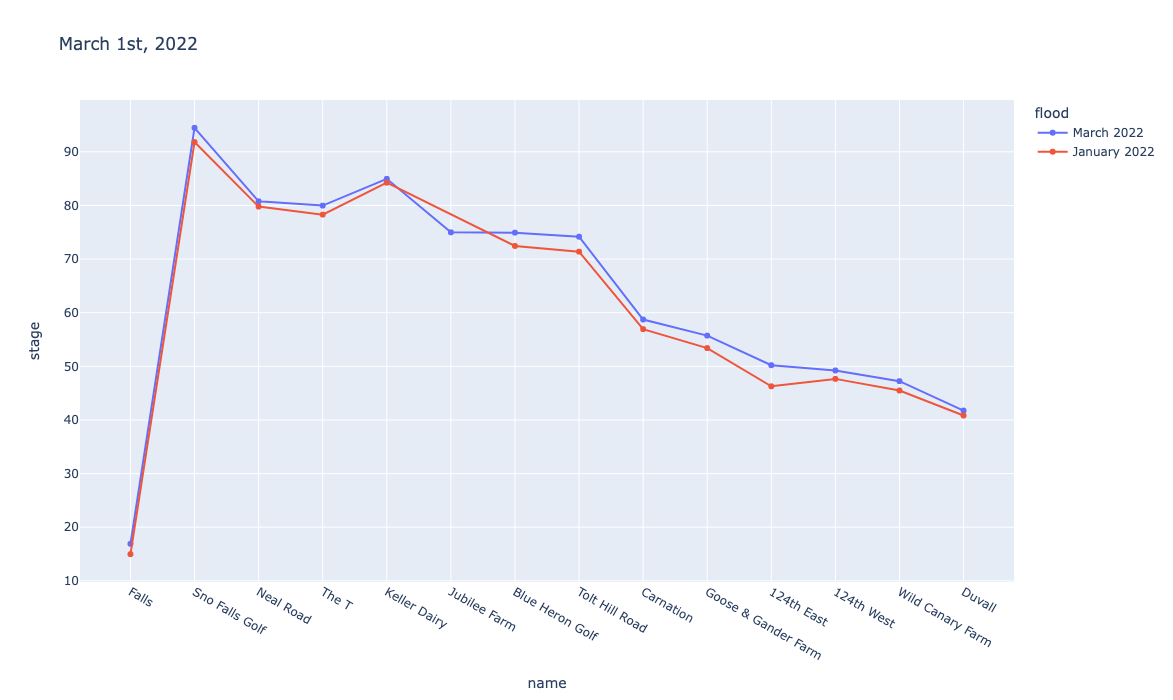

In [8]:
import plotly.express as px

fig = px.line(pd.concat([m_df, j_df]), x="name", y="stage", title='March 1st, 2022', color="flood", markers=True, height=700)
# fig['layout']['xaxis']['autorange'] = "reversed"

fig.show()

In [9]:
import requests

response = requests.get("https://floodzilla.com/api/client/APIGetLocationInfo?regionId=1")
gauges = response.json()
carn = next(g for g in gauges if g['id'] == "USGS-22")
floods_df = pd.DataFrame(carn['floodEvents'])
floods_df

id            eventName             fromDate               toDate
0   30         2022 - March  2022-02-28T00:00:00  2022-03-06T00:00:00
1   29  2022 - January 21st  2022-01-20T00:00:00  2022-01-22T00:00:00
2   28  2022 - January 13th  2022-01-11T00:00:00  2022-01-15T00:00:00
3   26   2022 - January 7th  2022-01-06T00:00:00  2022-01-09T00:00:00
4   25      2021 - November  2021-11-11T00:00:00  2021-11-18T00:00:00
5   24       2021 - October  2021-10-28T00:00:00  2021-10-31T00:00:00
6   34      2021 - February  2021-02-21T00:00:00  2021-02-25T00:00:00
7   23       2021 - January  2021-01-12T00:00:00  2021-01-15T00:00:00
8   22  2020 - February 7th  2020-02-04T00:00:00  2020-02-13T00:00:00
9   20  2020 - February 1st  2020-01-31T00:00:00  2020-02-05T00:00:00
10  19       2020 - January  2020-01-06T00:00:00  2020-01-11T00:00:00
11  18      2019 - December  2019-12-20T00:00:00  2019-12-24T00:00:00
12  13       2019 - October  2019-10-21T00:00:00  2019-10-25T00:00:00

In [10]:
crest_dfs = []
for flood in carn['floodEvents']:
    flood_df = df[(df['utc'] - pd.Timedelta(8, unit='h') >= flood['fromDate']) & (df['utc'] -  pd.Timedelta(8, unit='h') <= flood['toDate'])].copy()
    flood_df['flood'] = flood['eventName']
    crest_dfs.append(flood_df)
crest_df = pd.concat(crest_dfs)
crest_df = pd.merge(crest_df, loc_df, left_on='location', right_on="id")    
crest_df = crest_df[~pd.isnull(crest_df['riverMile'])]
crest_df.sort_values(by=['flood','riverMile'], ascending=False, inplace = True)

#fix falls
crest_df['adjStage'] = crest_df['stage']
crest_df.loc[crest_df['location'] == '12144500', 'adjStage'] = crest_df['stage'] + 100

# filter dates
crest_df = crest_df[crest_df['utc'] > '2018-09-09']

# remove multi-crests
group_df = crest_df.groupby(['flood','name']).max()
group_df.reset_index(inplace=True)
group_df.sort_values(by=['flood','riverMile'], ascending=False, inplace = True)
group_df.head()

flood            name                 utc       id_x  stage  \
127  2022 - March           Falls 2022-03-01 16:00:00        NaN  16.91   
132  2022 - March  Sno Falls Golf 2022-03-01 17:15:06  1393330.0  94.47   
131  2022 - March       Neal Road 2022-03-01 18:44:56  1393432.0  80.77   
133  2022 - March           The T 2022-03-01 19:59:59  1393516.0  79.97   
130  2022 - March    Keller Dairy 2022-03-01 18:30:05  1393418.0  84.96   

    stage_qualifiers  location  discharge discharge_qualifiers      id_y  \
127                P  12144500    36400.0                    P  12144500   
132              NaN   SVPA-37        NaN                  NaN   SVPA-37   
131              NaN   SVPA-36        NaN                  NaN   SVPA-36   
133              NaN   SVPA-34        NaN                  NaN   SVPA-34   
130              NaN   SVPA-33        NaN                  NaN   SVPA-33   

    source upstreamOf  riverMile  stageOffset  adjStage  
127   USGS   12149000       38.0        120.0    116.91  
132   SVPA        NaN       37.0          NaN     94.47  
131   SVPA        NaN       36.0          NaN     80.77  
133   SVPA        NaN       34.0          NaN     79.97  
130   SVPA        NaN       33.0          NaN     84.96

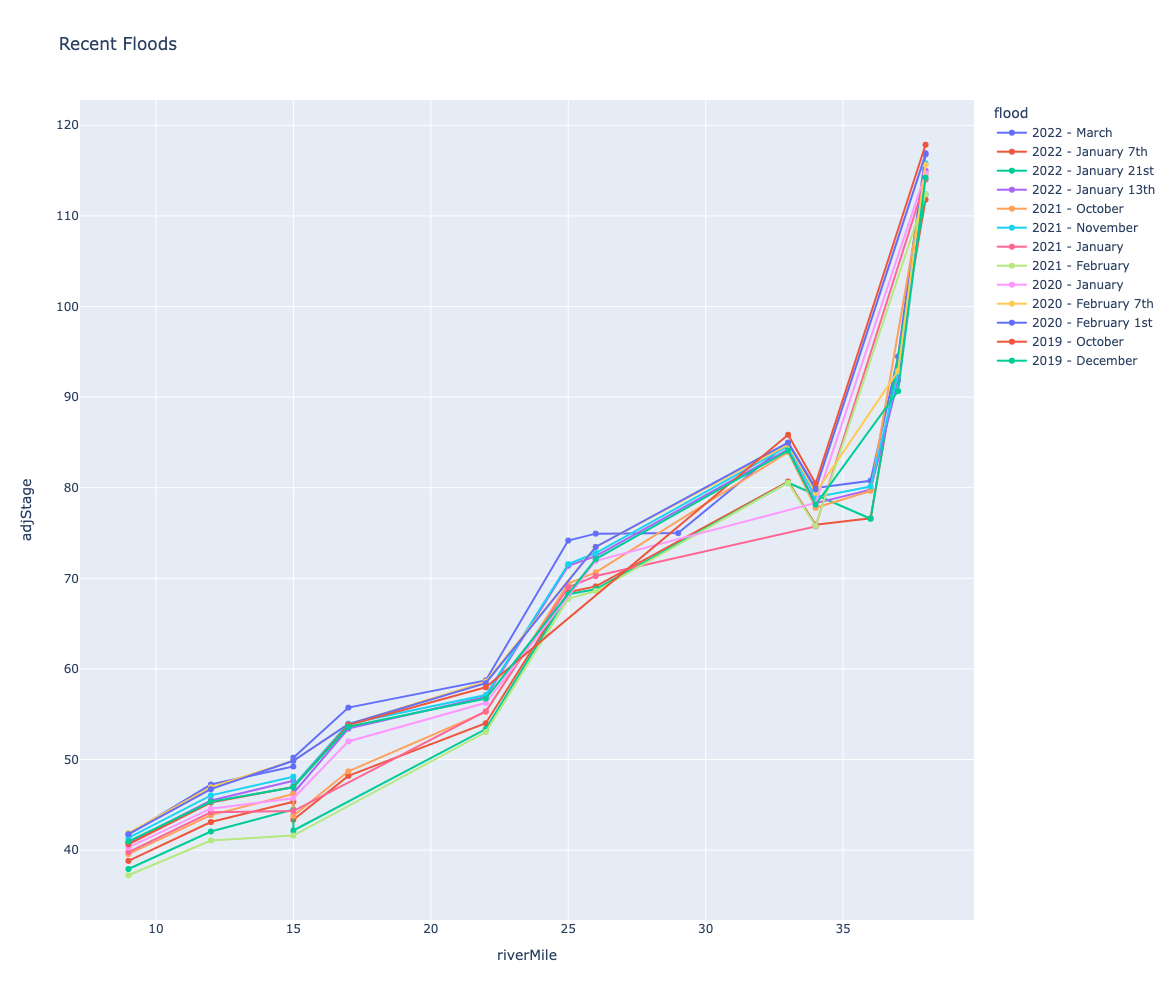

In [11]:
import plotly.express as px

fig = px.line(group_df, x="riverMile", y="adjStage", title='Recent Floods', color="flood", markers=True, height=1000)
# fig['layout']['xaxis']['autorange'] = "reversed"

fig.show()

In [12]:
gauges_df = pd.DataFrame(gauges)
gauges_df['mergeId'] = gauges_df['id']
gauges_df.loc[gauges_df['usgsSiteId'] > 0,'mergeId'] = gauges_df['usgsSiteId'].astype(str)
gauges_df.head()

id                        locationName        shortName   latitude  \
0  USGS-SF17         South Fork Snoqualmie River       South Fork  47.415109   
1  USGS-MF11        Middle Fork Snoqualmie River      Middle Fork  47.485940   
2  USGS-NF10         North Fork Snoqualmie River       North Fork  47.614825   
3    USGS-38  Snoqualmie River - Below the Falls  Below the Falls  47.545102   
4    SVPA-37        Snoqualmie Falls Golf Course   Sno Falls Golf  47.561390   

    longitude  isOffline  rank   yMin  yMax  dischargeMin  ...  noaaSiteId  \
0 -121.587321      False   5.0   9.00  18.0         100.0  ...       GARW1   
1 -121.647881      False  10.0   0.00  15.0         100.0  ...       TANW1   
2 -121.713444      False  15.0   0.00  12.0         100.0  ...       SNQW1   
3 -121.842336      False  22.0   0.00  18.0         100.0  ...       SQUW1   
4 -121.878524       True  25.0  86.03  98.6           NaN  ...         NaN   

   isCurrentlyOffline                                        floodEvents  \
0               False  [{'id': 30, 'eventName': '2022 - March', 'from...   
1               False  [{'id': 30, 'eventName': '2022 - March', 'from...   
2               False  [{'id': 30, 'eventName': '2022 - March', 'from...   
3               False  [{'id': 30, 'eventName': '2022 - March', 'from...   
4                True  [{'id': 30, 'eventName': '2022 - March', 'from...   

   dischargeStageOne dischargeStageTwo roadSaddleHeight    roadDisplayName  \
0                NaN               NaN              NaN                NaN   
1                NaN               NaN              NaN                NaN   
2                NaN               NaN              NaN                NaN   
3            17000.0           20000.0              NaN                NaN   
4                NaN               NaN             88.6  lower parking lot   

                                  locationImages maxChangeThreshold   mergeId  
0                                            NaN                NaN  12143400  
1                                            NaN                NaN  12141300  
2                                            NaN                NaN  12142000  
3                                            NaN                NaN  12144500  
4  [7/e8605b94-d37a-4f81-a636-789970b95caf.jpeg]                NaN   SVPA-37  

[5 rows x 28 columns]

In [13]:
report_df = pd.merge(group_df[['flood','name','utc','stage','location']], gauges_df[['mergeId','rank','yMin']], left_on='location', right_on='mergeId')
report_df.sort_values(by=['flood','rank'], ascending=False, inplace = True)
#min
tmp_group = report_df.groupby(['name']).min()
tmp_group['minStage'] = tmp_group['stage']
report_df = pd.merge(report_df, tmp_group[['location','minStage']], on="location")
#max
tmp_group = report_df.groupby(['name']).max()
tmp_group['maxStage'] = tmp_group['stage']
report_df = pd.merge(report_df, tmp_group[['location','maxStage']], on="location")
report_df['normStage'] = report_df['stage'] - report_df['minStage']
report_df['stageRangePrecent'] = 100 * (report_df['stage'] - report_df['minStage']) / (report_df['maxStage'] - report_df['minStage'])

report_df.head()

flood    name                 utc  stage  location   mergeId  \
0         2022 - March  Duvall 2022-03-02 10:00:00  41.75  12150400  12150400   
1   2022 - January 7th  Duvall 2022-01-08 14:30:00  38.81  12150400  12150400   
2  2022 - January 21st  Duvall 2022-01-21 19:30:00  37.92  12150400  12150400   
3  2022 - January 13th  Duvall 2022-01-14 01:00:00  40.83  12150400  12150400   
4       2021 - October  Duvall 2021-10-30 06:00:00  39.56  12150400  12150400   

    rank  yMin  minStage  maxStage  normStage  stageRangePrecent  
0  200.0  15.0     37.23     41.88       4.52          97.204301  
1  200.0  15.0     37.23     41.88       1.58          33.978495  
2  200.0  15.0     37.23     41.88       0.69          14.838710  
3  200.0  15.0     37.23     41.88       3.60          77.419355  
4  200.0  15.0     37.23     41.88       2.33          50.107527

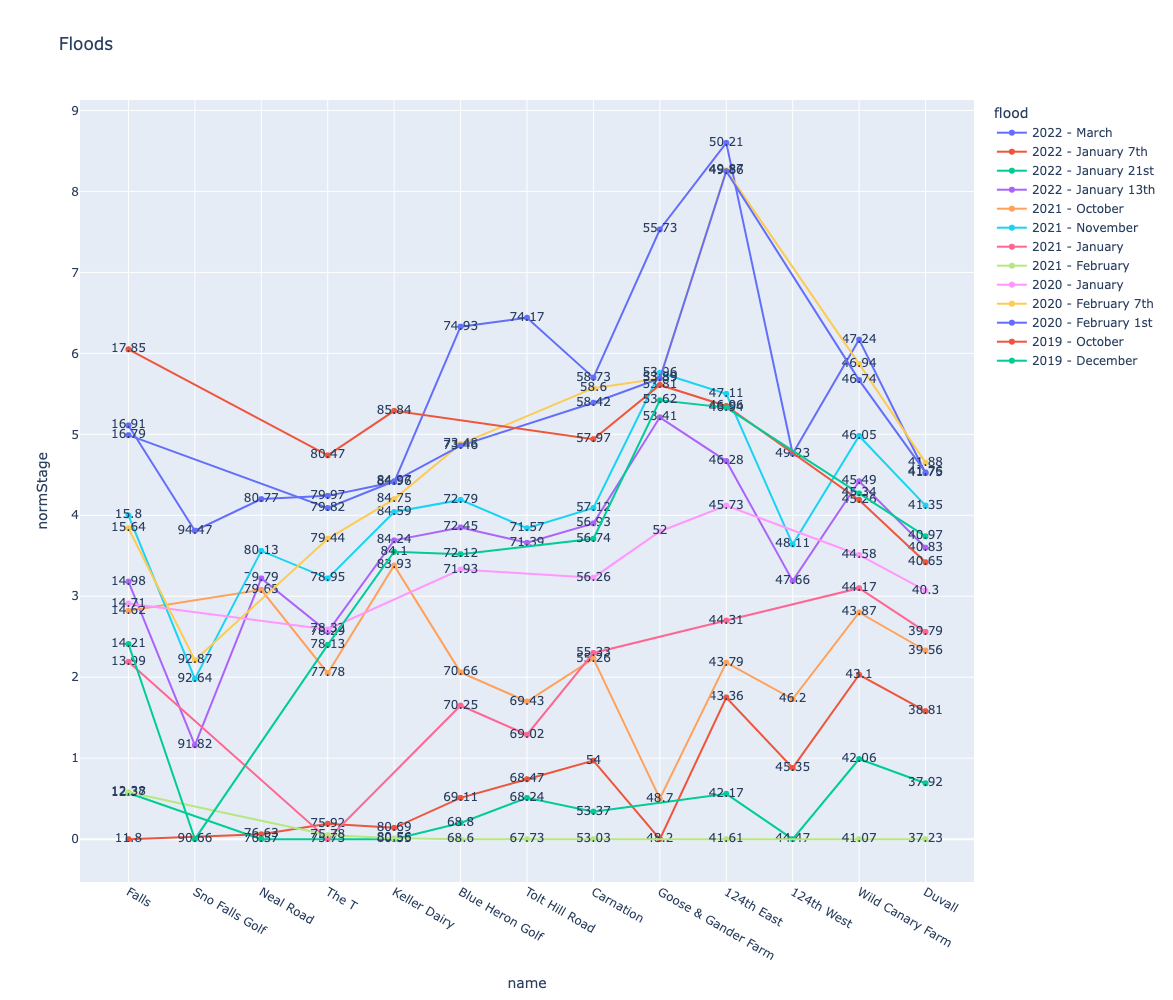

In [14]:
import plotly.express as px

fig = px.line(report_df, x="name", y="normStage", title='Floods', color="flood", markers=True, height=1000, text="stage")
fig['layout']['xaxis']['autorange'] = "reversed"

fig.show()

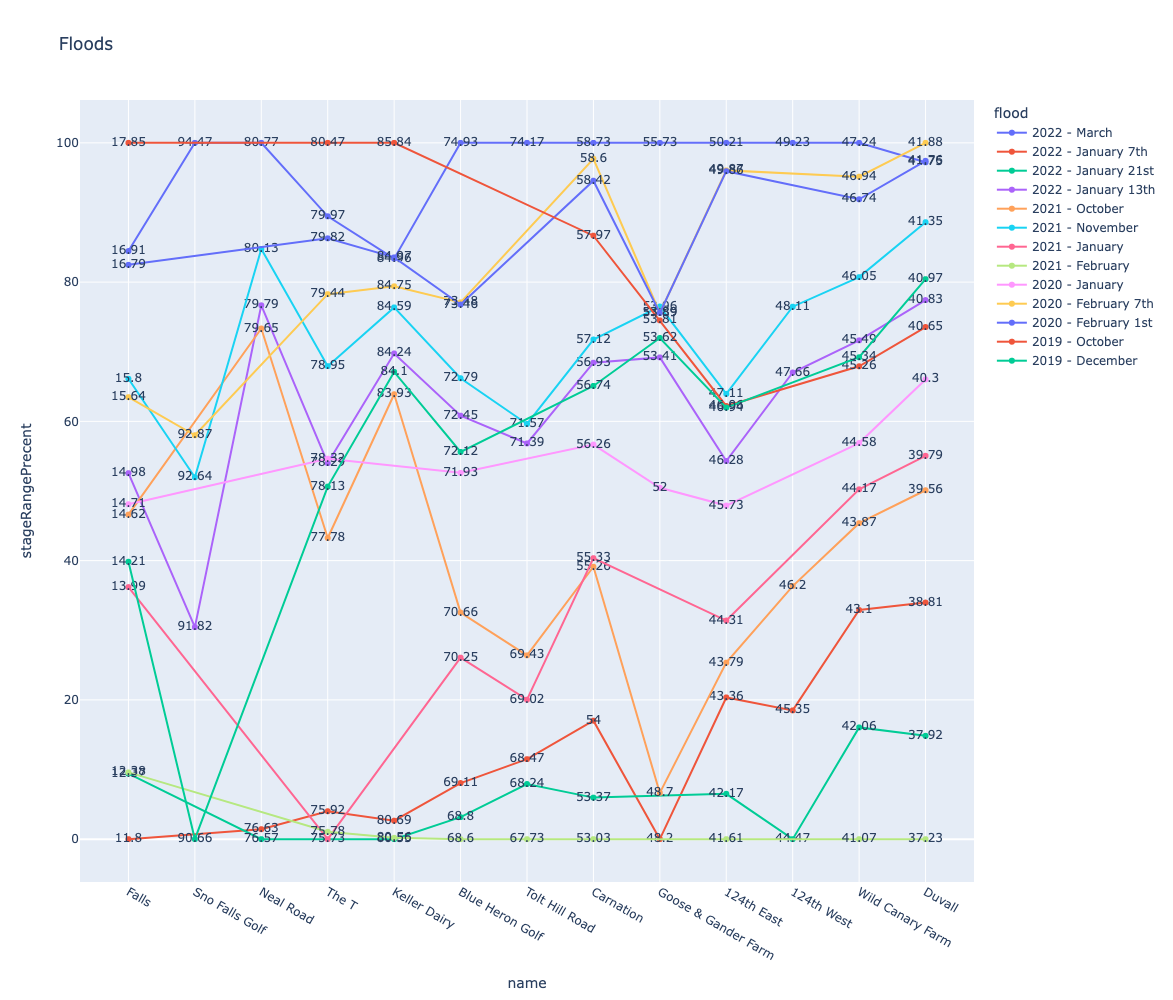

In [15]:
import plotly.express as px

fig = px.line(report_df, x="name", y="stageRangePrecent", title='Floods', color="flood", markers=True, height=1000, text="stage")
fig['layout']['xaxis']['autorange'] = "reversed"

fig.show()